In [7]:
import pandas as pd
import numpy as np
import requests
# import tweepy
import json 
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def query_twitter_api(ids: list, needed_columns: list,  filename: str) -> None:
    """A function to send query to twitter's API and store the data frame in the file passed in the parameter

    Args:
        ids (list): tweet ids
        needed_columns: columns those are extracted from the json data
        filename (str): a file to store all the tweets data
    """
    all_tweets = []
    
    for id in ids:
        try:
            tweet = api.get_status(str(id), tweet_mode='extended')
            # Collect all the tweets
            all_tweets.append({
                key: value for key, value in tweet._json.items() if key in needed_columns
            })
        except Exception as e:
            print(f"{id} not found")
    
    # Create a Data Frame
    all_tweets = pd.DataFrame(all_tweets, columns=needed_columns)
    # Store it as csv file
    all_tweets.to_csv(filename)
    
    print(all_tweets.shape[0], "rows retrieved from twitter API")

In [9]:
tweets_archive = pd.read_csv("twitter-archive-enhanced.csv", sep=",")
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [11]:
tweets = []

needed_columns = ["id", "retweet_count", "favorite_count"]

with open("tweet-json.txt", "r") as tweets_file:
    
    # reading the tweets line by line
    for tweet in tweets_file:
        # converting the text to dictionary
        tweet = json.loads(tweet)
        
        # collect the required attributes
        tweets.append({
            key: value for key, value in tweet.items() if key in needed_columns
        })
    
    # Create a Data Frame
    tweets = pd.DataFrame(tweets, columns=needed_columns)
    
    print(tweets.shape[0], "rows retrieved from tweets file")

2354 rows retrieved from tweets file


In [12]:
tweets_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [13]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [14]:
tweets

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

<a id="programmatic_assessment"></a>
### Programmatic Assessment

Programmatically assessing each individual datasets

In [15]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Issues Found**
- timestamp datatype
- missing values for `expanded_url`
- un useful columns like `retweeted_status_id`, `retweeted_status_user_id`
  
**Further Assessment**
- `rating_numerator` and `rating_denominator` values
- dog stage values (No single missing row, i.e., incorrect values are assigned)

In [16]:
tweets_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Issues Found**
- Incorrect rate values for both `numerator` and `denominator`

In [18]:
tweets_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

**Issues Found**
- None values instead of `None`

In [19]:
tweets_archive.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

**Issues Found**
- Tweet texts and link together

In [20]:
tweets_archive.iloc[0].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

**Issues Found**
- Should contain only the source device

In [21]:
tweets_archive.iloc[0].expanded_urls

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [22]:
tweets_archive.name.value_counts().index

Index(['None', 'a', 'Charlie', 'Lucy', 'Cooper', 'Oliver', 'Lola', 'Penny',
       'Tucker', 'Winston',
       ...
       'Edgar', 'Iroh', 'Crouton', 'Maude', 'Gilbert', 'Sweets', 'Darrel',
       'Florence', 'Timofy', 'Jackie'],
      dtype='object', length=957)

**Issues Found**
- Incorrect names like `a`, `the`, `an`

In [23]:
tweets_archive.duplicated().sum()

0

No duplicates found. So, moving to `image_predictions` dataset

In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Issues Found**
- three different prediction values instead of one; like `p1_conf`, `p2_conf`, and `p3_conf`

In [25]:
image_predictions[image_predictions.img_num == 4].head()

tweet_id                                          jpg_url  \
144   668623201287675904  https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg   
779   689905486972461056  https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg   
1024  710588934686908417  https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg   
1161  734787690684657664  https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg   
1286  750868782890057730  https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg   

      img_num                p1   p1_conf  p1_dog                 p2  \
144         4         Chihuahua  0.708163    True         Pomeranian   
779         4        Pomeranian  0.943331    True  Shetland_sheepdog   
1024        4          Pembroke  0.982004    True           Cardigan   
1161        4  golden_retriever  0.883991    True               chow   
1286        4        toy_poodle  0.912648    True   miniature_poodle   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
144   0.091372    True                titi  0.067325   False  
779   0.023675    True                chow  0.007165    True  
1024  0.008943    True            malamute  0.007550    True  
1161  0.023542    True  Labrador_retriever  0.016056    True  
1286  0.035059    True           seat_belt  0.026376   False

**Issues Found**
- Un useful column `img_num`

In [26]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [27]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

**Issues Found**
- Unstandardized name structure for dog breeds

In [28]:
image_predictions[(image_predictions.p1_dog == False) & (image_predictions.p2_dog == False) & (image_predictions.p3_dog == False)].shape

(324, 12)

In [29]:
image_predictions.duplicated().sum()

0

<a id="documenting_issues"></a>
## Documenting Issues Found While Assessing

In this section, I will document all the issues I found while assessing the datasets putting them under the category of `Quality` and `Tidiness` issues.  
  
**NOTE**:
- `Quality` issues are issues related with the content of data (The missing, incorrect, inconsistent, and duplicated values)
- `Tidiness` issues are related with the structure of the data
  
  
The following points are `Tidiness` rules:  
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

<a id="quality_issues"></a>
### Quality issues

`tweets_archive` Dataset
1. Clean retweets (reply to a user or tweet) using `in_reply_to_status_id` and/or `in_reply_to_user_id`
2. `timestamp` to `datetime
2. `text` column supposed to contain only tweet text (`tweet_link` should be removed)
4. Same scale and range for `rating_denominator` and `rating_numerator` columns respectively
6. Extract the source from `source` column 
8. Incorrect names like 'a', 'an', 'very', 'the' in `name` column 
8. Incorrect values for dog stage values; `None` instead of `NaN` or empty string
8. Missing values for `expanded_urls`

`image_predictions` Dataset
1. Only one prediction for dog image instead of three
1. Unstandardized naming for dog breed

`All`
1. Unnecessary columns like `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `img_num`

<a id="tidiness_issues"></a>
### Tidiness issues

`tweets_archive` Dataset
1. `dog_stage` supposed to be in single column

`All`
1. All Datasets supposed to be merged

<a id="cleaning"></a>
## Cleaning Data

In this section, I will go through the cleaning process of **all** the issues I documented above while assessing. 
  
**Note:** Making a copy of the original data before starting the cleaning process is a good habit so that we can recover back to the original state easily just incase something happened while cleaning.

In [30]:
# Making copies of original pieces of data
tweets_archive_cpy = tweets_archive.copy()
image_predictions_cpy = image_predictions.copy()
tweets_cpy = tweets.copy()

Because tidy datasets with data quality issues are almost always easier to clean than untidy datasets with the same issues, I address cleaning the tidiness issues first.

<a id="cleaning_tidiness"></a>
### Cleaning Tidiness

<a></a>
#### `tweets_archive` Dataset

<a></a>
##### Issue 1: `dog_stage` supposed to be in single column

**Define**
- Replace `None` values by empty string
- Add the columns to create `dog_stage` column
- Separate dog stage names by `, ` from the `dog_stage` column
- Drop the stage columns

In [31]:
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
# Replacing the `None` values by empty string
for column in ['doggo', 'floofer', 'pupper', 'puppo']:
    tweets_archive[column].replace('None', '', inplace=True)

In [33]:
# Taking a look at the arrangement of dog stages
tweets_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index()

doggo  floofer  pupper  puppo     0
0                                 1976
1                          puppo    29
2                  pupper          245
3         floofer                    9
4  doggo                            83
5  doggo                   puppo     1
6  doggo           pupper           12
7  doggo  floofer                    1

In [34]:
# Adding all the stages and creating `dog_stage` column
tweets_archive['dog_stage'] = tweets_archive.doggo +  tweets_archive.floofer +  tweets_archive.pupper +  tweets_archive.puppo

# Separating the dog stages
tweets_archive.loc[tweets_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tweets_archive.loc[tweets_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweets_archive.loc[tweets_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Dropping the stage columns
tweets_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [35]:
tweets_archive.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [36]:
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

<a id="cleaning_quality"></a>
### Cleaning Quality

<a></a>
#### `tweets_archive` Dataset

<a></a>
##### Issue #1: Clean retweets (reply to a user or tweet) uring `in_reply_to_status_id` and/or `in_reply_to_user_id`


- Filter the data points which doesn't have `in_reply_to_status_id` or `in_reply_to_user_id`

In [37]:
# Dropping the reply tweets
tweets_archive.drop(
    index=tweets_archive[(tweets_archive.in_reply_to_status_id.notna()) & (tweets_archive.in_reply_to_user_id.notna())].index,
    inplace=True)

In [38]:
# check
tweets_archive[(tweets_archive.in_reply_to_status_id.notna()) & (tweets_archive.in_reply_to_user_id.notna())].shape

(0, 14)

<a></a>
##### Issue #2: `timestamp` to `datetime`

- Convert the `timestamp` column type to `datetime`

In [39]:
# Converting to datetime
tweets_archive.timestamp = pd.to_datetime(tweets_archive.timestamp, format="%Y-%m-%d %H:%M:%S")

In [40]:
#check
tweets_archive.timestamp.dtype

dtype('<M8[ns]')

<a></a>
##### Issue #3: `text` column supposed to contain only tweet text (`tweet_link` should be removed)

- Check the pattern first
- Remove the tweet links from the `text` column

In [41]:
# checking the pattern
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'text']

"This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/XKJrmO4fAQ"

The pattern is, the links are found at the end of the text. So, I can replace them with empty string using regex

In [42]:
# Replacing the `links` with empty string and remove the trailing empty strings
tweets_archive.text = tweets_archive.text.str.replace("(https://[\w\/\.]+$)", "", regex=True)
tweets_archive.text = tweets_archive.text.str.strip()

In [43]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'text']

"This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her"

<a></a>
##### Issue #4: Same scale and range for `rating_denominator` and `rating_numerator` columns respectively
​

- Extract the `rating_numerator` and `rating_denominator`
- Replace the previous ones, if the base of the later is correct
- Filter the data points not having a value of `10` for `rating_denominator`
- Replace by correct ratings
- Scale the numerator and denominator to a range of value `10`
- Filter the data points their values are higher than `15`
- Replace the above filtered by the mean of the rest

Defining helper function

In [44]:
def hierarchical_replacement(df: pd.DataFrame, ref_col: str, hierarchical_cols: list, hierarchical_values: list):
    """Iteratively loop through the hierarchical columns and replace the `ref_col` values by corresponding value

    Args:
        df (pd.DataFrame): a data frame we want to work on
        ref_col (str): a reference (a column) to refer and assign value
        hierarchical_cols (list): the hierarchical columns list
        hierarchical_values (list): hierarchical value columns list
    """
    for key, column in enumerate(hierarchical_cols):
        filtered = df[(df[ref_col].isna()) & (df[column].notnull())]
        df.loc[filtered.index, ref_col] = filtered[hierarchical_values[key]]

In [45]:
# Find all the ratings, including fractional values
tweets_archive['ratings'] = tweets_archive.text.str.findall(r"\d*\.?\d+\/\d+").str.join(',')
tweets_archive[['first', 'second', 'ratings']] = tweets_archive.ratings.str.split(',', expand=True)

# resetting index
tweets_archive.reset_index(inplace=True)

# recursively replace the values
hierarchical_replacement(tweets_archive, 'ratings', ['second', 'first'], ['second', 'first'])

# creating new numerator and denominator
tweets_archive.ratings = tweets_archive.ratings.str.strip('.')
tweets_archive[['new_numerator', 'new_denominator']] = np.round(tweets_archive.ratings.str.split('/', expand=True).astype(float), 0).astype(int)

In [46]:
# replace the correct denominators having base 10 along with numerators
filtered = tweets_archive[tweets_archive.rating_denominator != tweets_archive.new_denominator]
tweets_archive.loc[filtered.index, 'rating_numerator'] = filtered['new_numerator']
tweets_archive.loc[filtered.index, 'rating_denominator'] = filtered['new_denominator']


In [47]:
# replace the the correct numerators
filtered = tweets_archive.query('((new_numerator > rating_numerator) | (rating_numerator > 15)) & (rating_denominator == 10)')
tweets_archive.loc[filtered.index, 'rating_numerator'] = tweets_archive.new_numerator

In [48]:
# bringing different value ranges to 10
filtered = tweets_archive.query('(new_numerator == rating_numerator) & (rating_denominator != 10)')
tweets_archive.loc[filtered.index, 'rating_numerator'] = np.round(tweets_archive.rating_numerator * 10 / tweets_archive.rating_denominator, 0).astype(int)
tweets_archive.loc[filtered.index, 'rating_denominator'] = 10

In [49]:
# replace extream values by the mean
tweets_archive.loc[tweets_archive.rating_numerator > 15, 'rating_numerator'] = tweets_archive.rating_numerator.mean().astype(int)

In [50]:
# drop unnecessary columns
tweets_archive.drop(columns=['first', 'second', 'ratings', 'new_numerator', 'new_denominator'], inplace=True)

In [53]:
#validate
tweets_archive.rating_numerator.unique(), tweets_archive.rating_denominator.unique()

(array([13, 12, 14, 11, 10,  6, 15,  0,  7,  9,  8,  1,  5,  3,  4,  2]),
 array([10]))

<a></a>
##### Issue #5: Extract the source from `source` column 


- Replace the html tags and with corresponding text

In [54]:
tweets_archive.groupby('source').source.count()

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2143
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [55]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [57]:
replacements = {
    'Twitter for iPhone': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
    'Twitter Web Client': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
    'Vine - Make a Scene': '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
    'TweetDeck': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
}

for key, value in replacements.items():
    tweets_archive.source.replace(value, key, inplace=True)

In [58]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'source']

'Twitter for iPhone'

<a></a>
##### Issue #6: Incorrect names like 'a', 'an', 'vary', 'None' in `name` column 

- Replace the names those doesn't start with capital letter by `NaN`

In [59]:
# Name should be starting by capital letter
tweets_archive[tweets_archive.name.str.lower() == tweets_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [60]:
# Replace the names those doesn't start with capital letter
tweets_archive['name'] = tweets_archive['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

# Replacing None values by `NaN`
tweets_archive.name.replace('None', np.nan, inplace=True)

In [61]:
tweets_archive.name.value_counts()

Charlie        12
Lucy           11
Oliver         11
Cooper         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
Toby            7
Buddy           7
Bailey          7
Daisy           7
Bella           6
Leo             6
Stanley         6
Milo            6
Oscar           6
Koda            6
Rusty           6
Dave            6
Jax             6
Jack            6
Scout           6
Chester         5
Alfie           5
Oakley          5
Bentley         5
Finn            5
               ..
Ozzie           1
Dietrich        1
Koko            1
Humphrey        1
Tripp           1
Bubba           1
Florence        1
Combo           1
Rover           1
Rinna           1
Shakespeare     1
Snoop           1
Blue            1
Zoe             1
Wishes          1
Poppy           1
Jockson         1
Millie          1
Buckley         1
Darrel          1
Glenn           1
Barry           1
Ralphy          1
Jazzy           1
Iroh      

<a></a>
##### Issue #7: Incorrect values for dog stage values; `None` instead of `NaN`

- Replace the empty dog stage values by `NaN`

In [63]:
# Checking the values before replacing
tweets_archive.dog_stage.value_counts()

                  1906
pupper             242
doggo               80
puppo               28
doggo, pupper       11
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [64]:
# Replacing the empty strings
tweets_archive.dog_stage.replace("", np.nan, inplace=True)

In [65]:
tweets_archive.dog_stage.value_counts()

pupper            242
doggo              80
puppo              28
doggo, pupper      11
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

<a></a>
#### `image_predictions` Dataset

<a></a>
##### Issue #1: Only one prediction for dog image instead of three

**NOTE:** The predictions are hierarchical, i.e., `p1_conf` is the highest and `p2_conf` is the second and so on.  
  
- Create a column `dog_breed`
- Filter the data points with `True` values for `p1_dog`
- Assign value of `p1` to `dog_breed` column for the above filtered data points
- Repeat step 2 and 3 for `p2_dog` and `p3_dog`, if the prediction for the previous isn't dog
- Drop the unnecessary columns

In [66]:
# Creating a Column with NaN value
image_predictions['dog_breed'] = np.nan

# replacing False values by NaN
for column in ['p1_dog', 'p2_dog', 'p3_dog']:
    image_predictions[column].replace(False, np.nan, inplace=True)

# Iteratively replace the values
hierarchical_replacement(image_predictions, 'dog_breed', ['p1_dog', 'p2_dog', 'p3_dog'], ['p1', 'p2', 'p3'])

# Dropping the unnecessary columns
image_predictions.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [67]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed'], dtype='object')

In [68]:
image_predictions.dog_breed.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: dog_breed, dtype: object

<a></a>
##### Issue #2: Unstandardized naming for dog breed

- Capitalize all the starting small letters

In [69]:
# Capitalizing
image_predictions.dog_breed = image_predictions.dog_breed.str.capitalize()

In [70]:
np.random.seed(45)
image_predictions.dog_breed.sample(5)

737          Borzoi
815         Samoyed
1011    Maltese_dog
782         Samoyed
417      Pomeranian
Name: dog_breed, dtype: object

<a></a>
#### `All` Datasets

<a></a>
##### Issue #1: Unnecessary columns like:
- `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` in `tweeter_archive` dataset
- `img_num` in `image_predictions` dataset

- Drop the unnecessary columns one by one from each dataset

In [71]:
# Dropping from tweets_archive dataset
tweets_archive.drop(columns=[
    'in_reply_to_status_id', 'in_reply_to_user_id',
    'retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp'
], inplace=True)

In [72]:
# Dropping from image_predictions dataset
image_predictions.drop(columns='img_num', inplace=True)

In [73]:
tweets_archive.columns

Index(['index', 'tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [74]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'dog_breed'], dtype='object')

<a id="merging"></a>
### Merging All Together

All datasets must be merged to a single datasets. So, I will merge them using `tweet_id` using `inner join`

In [76]:
# Checking the shape before merging
tweets_archive.shape, image_predictions.shape, tweets.shape

((2278, 10), (2075, 3), (2354, 3))

In [78]:
all_data = tweets_archive.merge(image_predictions, how='inner', on='tweet_id').merge(tweets, how='inner', left_on='tweet_id', right_on='id')
all_data.shape

(2050, 15)

<a id="storing"></a>
## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:


# storing data
all_data.to_csv('twitter_archive_master.csv', index=False)

<a id="analyzing"></a>
## Analyzing and Visualizing Data

<a id="questions"></a>
### Questions to Answer

1. What is the average rate value?
    - For ratings higher than 10
    - For ratings lower than 10
    - For each year
2. What is the ratio for the source of tweets?
3. What is the most popular dog name?
3. What is the most popular dog breed?
4. What is the ratio of dog stages?
5. What is the most retweeted tweet?
    - Yearly
6. Is the retweet counts increasing over time?
7. Most favorite dog

In [86]:
# Grouping yearly
yearly_grouped = all_data.groupby(all_data.timestamp.dt.year)

<a></a>
#### Q#1:

Text(0,0.5,'Count')

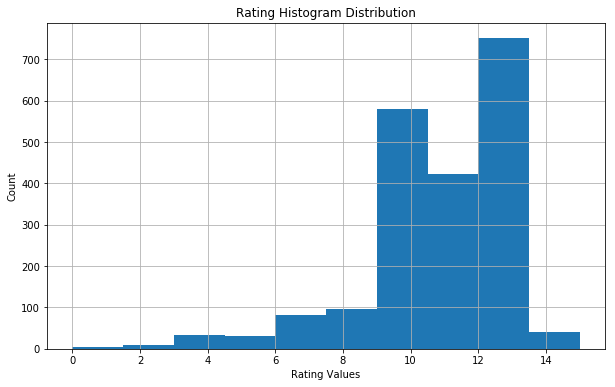

In [87]:
plt.figure(figsize=(10, 6))
all_data.rating_numerator.hist()
plt.title("Rating Histogram Distribution")
plt.xlabel("Rating Values")
plt.ylabel("Count")

In [88]:
# Overall rate average
np.round(all_data.rating_numerator.mean(), 0).astype(int)

11

In [89]:
# rates greater than 10
greater = all_data[all_data.rating_numerator > 10]
# rates lower than 10
lower = all_data[all_data.rating_numerator < 10]

# calculating means
np.round(greater.rating_numerator.mean(), 0).astype(int), np.round(lower.rating_numerator.mean(), 0).astype(int)

(12, 7)

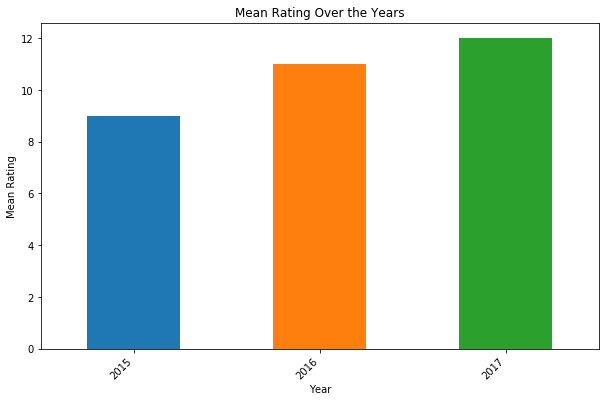

In [90]:
# Yearly rating
yearly_ratings = np.round(yearly_grouped.rating_numerator.mean()).astype(int)

plt.figure(figsize=(10, 6))
yearly_ratings.plot(kind='bar')
plt.title("Mean Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q#2

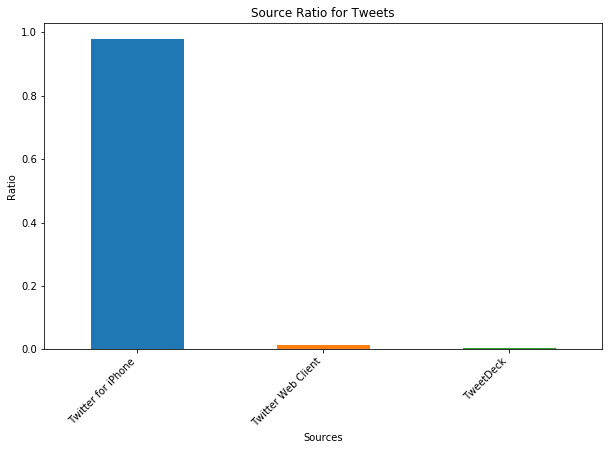

In [91]:
value_counts = all_data.source.value_counts(normalize=True)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title("Source Ratio for Tweets")
plt.xlabel("Sources")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #3

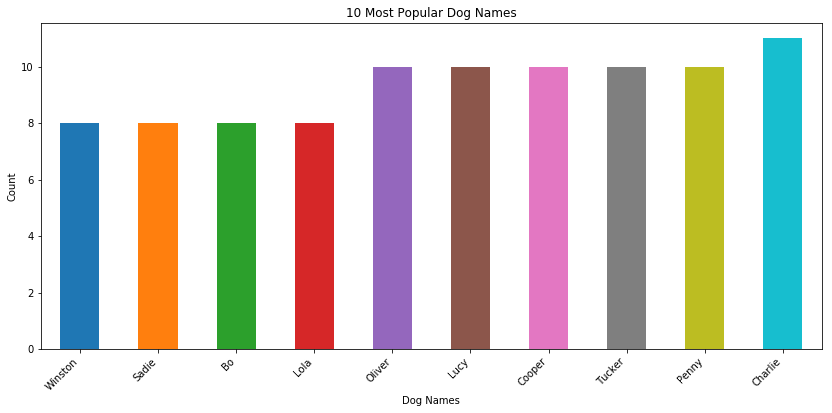

In [92]:
# filter dataset
dogs_with_name = all_data[all_data.name.notna()]

# Drawing the plot for 10 most frequent names
most_frequent = dogs_with_name.name.value_counts(ascending=True)[-10:]

plt.figure(figsize=(14, 6))
most_frequent.plot(kind='bar')
plt.title("10 Most Popular Dog Names")
plt.xlabel("Dog Names")
plt.ylabel("Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #4

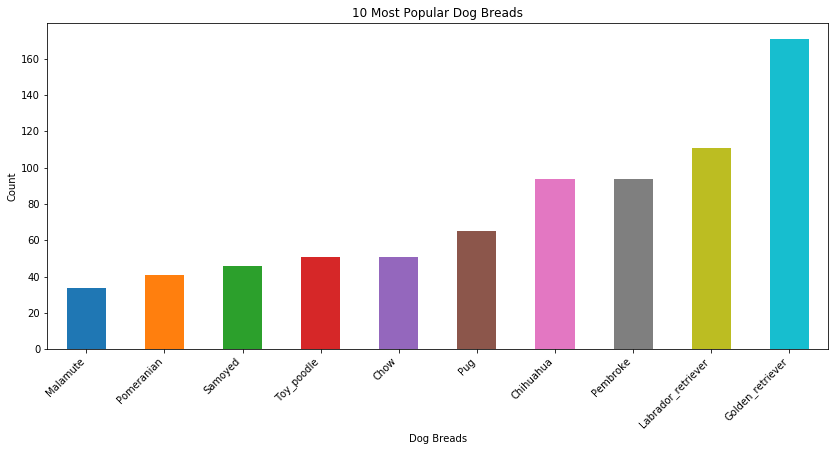

In [93]:
# filter dataset
dog_breads = all_data[all_data.dog_breed.notna()]

# Drawing the plot for 10 most frequent names
most_frequent = dog_breads.dog_breed.value_counts(ascending=True)[-10:]

plt.figure(figsize=(14, 6))
most_frequent.plot(kind='bar')
plt.title("10 Most Popular Dog Breads")
plt.xlabel("Dog Breads")
plt.ylabel("Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #5

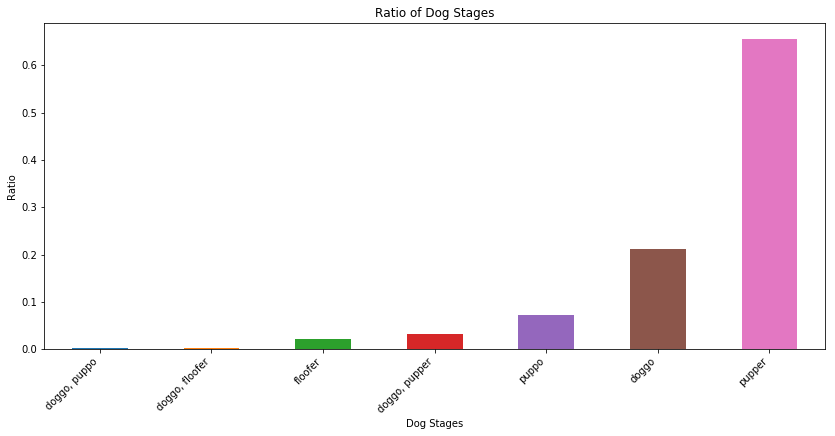

In [94]:
# Filter Data
dog_stages = all_data[all_data.dog_stage.notna()]
dog_stages = dog_stages.dog_stage.value_counts(normalize=True, ascending=True)

plt.figure(figsize=(14, 6))
dog_stages.plot(kind='bar')
plt.title("Ratio of Dog Stages")
plt.xlabel("Dog Stages")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #6

In [95]:
# The most retweeted tweet
all_data.loc[all_data.retweet_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                            Labrador_retriever
retweet_count                                                     79515
favorite_count                                                   131075
Name: 845, dtype: object

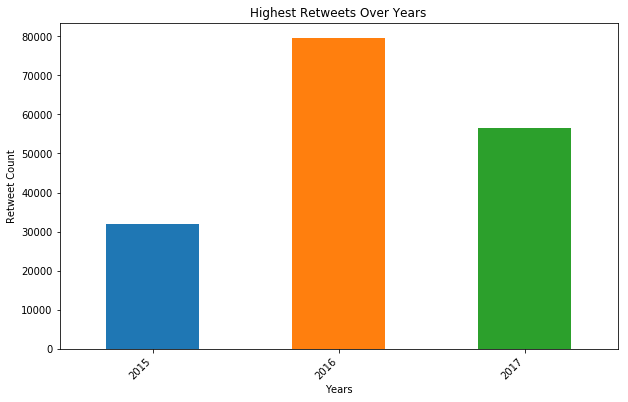

In [96]:
# Most retweets based on year
highest_retweets = yearly_grouped.retweet_count.max()

plt.figure(figsize=(10, 6))
highest_retweets.plot(kind='bar')
plt.title("Highest Retweets Over Years")
plt.xlabel("Years")
plt.ylabel("Retweet Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #7

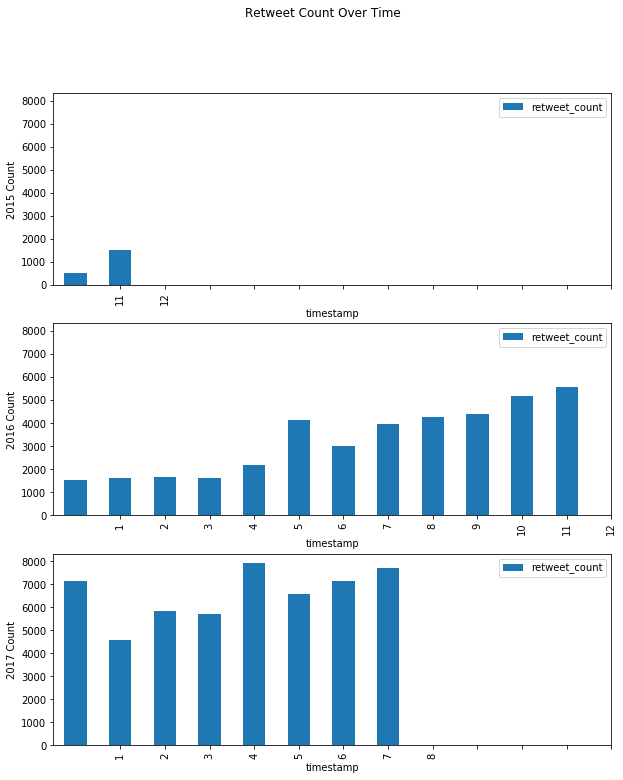

In [101]:
years_data = all_data.groupby([all_data.timestamp.dt.year, all_data.timestamp.dt.month]).agg({'retweet_count': 'mean'})

# Plotting
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharey=True)
years_data.xs(2015).plot(kind='bar', ax=axis[0])
years_data.xs(2016).plot(kind='bar', ax=axis[1])
years_data.xs(2017).plot(kind='bar', ax=axis[2])

axis[0].set_ylabel('2015 Count')
axis[1].set_ylabel('2016 Count')
axis[2].set_ylabel('2017 Count')

plt.setp(axis, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);
plt.suptitle("Retweet Count Over Time");

<a></a>
#### Q #8

In [102]:
# Most favorite dog
all_data.loc[all_data.favorite_count.idxmax()]

tweet_id                                             822872901745569793
timestamp                                           2017-01-21 18:26:02
source                                               Twitter for iPhone
text                  Here's a super supportive puppo participating ...
expanded_urls         https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         puppo
jpg_url                 https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
dog_breed                                              Lakeland_terrier
retweet_count                                                     48265
favorite_count                                                   132810
Name: 326, dtype: object